 # PROYECTO 2
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : Proyecto 2 \\
  

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: Luis Carbajal (100%)
 - Integrante 2: Diana Ñañez (100%)
 - Integrante 3: Leandro Machaca Soloaga(100%)



 ----

### Importamos las librerías necesarias para el Poryecto

In [28]:
!pip install pyts
!pip install h5py


In [29]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pyts.transformation import ROCKET
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from queue import PriorityQueue
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score


## Función para cargar la data

In [30]:
def load_h5_to_dataframe(file_path):
    with h5py.File(file_path, "r") as f:

        dataframes = []
        for key in list(f.keys()):

            dataset = np.array(f[key])

            if dataset.ndim > 1:
                num_features = dataset.shape[1]
                columns = [f"{key}_{i}" for i in range(num_features)]
                df = pd.DataFrame(dataset, columns=columns)
            else:
                df = pd.DataFrame(dataset, columns=[key])

            dataframes.append(df)

        combined_df = pd.concat(dataframes, axis=1)
        return combined_df



In [31]:
train_path = 'train.h5'
test_path = 'test.h5'

train_data = load_h5_to_dataframe(train_path)
test_data = load_h5_to_dataframe(test_path)

## Preprocesamiento

### Realizamos las diviciones de X_train en 70% (train) y 30% (test)

In [32]:

X = train_data.drop(columns=['y'])
Y = train_data['y']


X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=104, test_size=0.30, shuffle=True)



### Aplicamos el metodo ROCKET para extraer las características de la serie temporal

Elegimos este método por su rapidez y alta eficacia en la mayoria de casos

In [33]:
rocket = ROCKET()
X_train_rocket = rocket.fit_transform(X_train)
X_test_rocket = rocket.transform(X_test)

### Estandarizamos los datos

In [34]:
scaler = StandardScaler()
X_train_rocket = scaler.fit_transform(X_train_rocket)
X_test_rocket = scaler.transform(X_test_rocket)

### Aplicamos PCA para reducir la dimensionalidad

Obtenemos el mejor número de componentes ayudandonos de un análisis de la varianza

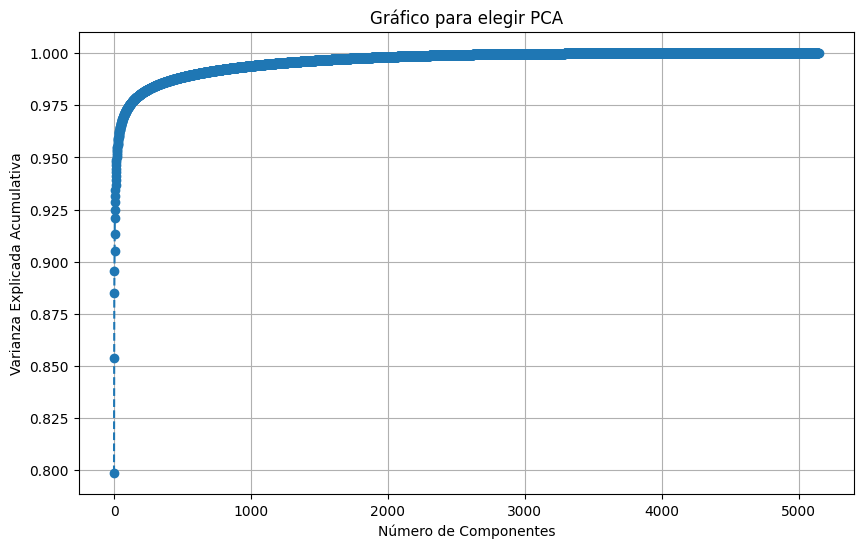

Número de componentes elegido: 20


In [35]:

# PCA con ROCKET

pca = PCA().fit(X_train_rocket)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1

plt.figure(figsize=(10, 6))
plt.plot(explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Gráfico para elegir PCA')
plt.grid(True)
plt.show()

print('Número de componentes elegido:', n_components)

Elegimos 20 componentes para realizar la reducción de dimensionalidad, ya que estos explican más del 95% de la varianza.

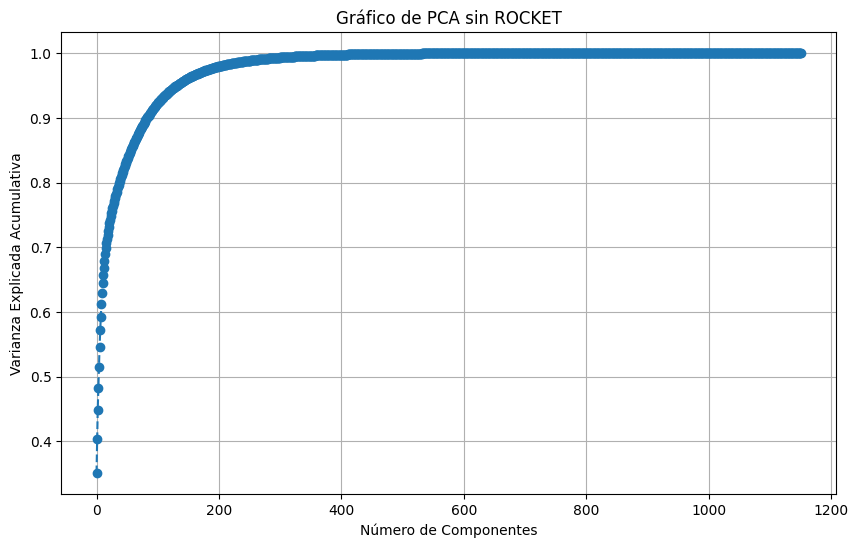

Número de componentes elegido: 132


In [36]:
# PCA sin ROCKET

pca_no_rocket = PCA().fit(X_train)
explained_variance_no_rocket = np.cumsum(pca_no_rocket.explained_variance_ratio_)
n_components_no_rocket = np.argmax(explained_variance_no_rocket >= 0.95) + 1

plt.figure(figsize=(10, 6))
plt.plot(explained_variance_no_rocket, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Gráfico de PCA sin ROCKET')
plt.grid(True)
plt.show()

print('Número de componentes elegido:', n_components_no_rocket)

A modo de comparación, si no aplicamos ROCKET el mejor número de componentes aumenta.

In [37]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rocket)
X_test_pca = pca.transform(X_test_rocket)

print(f'Mejor número de componentes: {n_components}')

Mejor número de componentes: 20


## Aplicacion de librerías
Utilizamos librerías para aplicar los modelos Regresión Logística y SVM para verificar el correcto preprocesamiento y ver que modelo se adapta mejor a nuestros datos

### Regresión logística

Modelo Usado: Regresión Logística:
Resultado del Accuracy: 0.9310970081595649
Resultado del F1-Score: 0.931080135260673
Reporte del Modelo:
               precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       369
         2.0       0.94      0.94      0.94       337
         3.0       0.92      0.94      0.93       285
         4.0       0.89      0.86      0.88       385
         5.0       0.88      0.89      0.88       402
         6.0       1.00      1.00      1.00       428

    accuracy                           0.93      2206
   macro avg       0.93      0.93      0.93      2206
weighted avg       0.93      0.93      0.93      2206





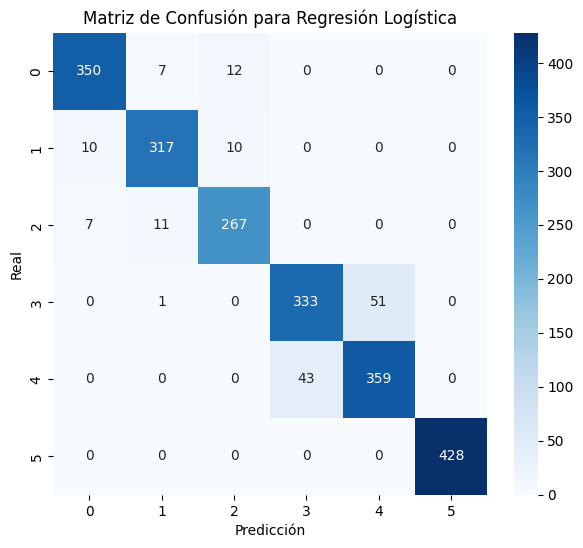

In [38]:

logistic_regression = LogisticRegression(max_iter=10000)


logistic_regression.fit(X_train_pca, y_train)
y_pred_logistic = logistic_regression.predict(X_test_pca)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')
cm_logistic = confusion_matrix(y_test, y_pred_logistic)


print("Modelo Usado: Regresión Logística:")
print("Resultado del Accuracy:", accuracy_logistic)
print("Resultado del F1-Score:", f1_logistic)
print("Reporte del Modelo:\n", classification_report(y_test, y_pred_logistic))
print("\n")


plt.figure(figsize=(7, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


### SVM

Modelo Usado: SVM:
Resultado del Accuracy: 0.9338168631006346
Resultado del F1-Score: 0.9337902890075331
Reporte del Modelo:
               precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       369
         2.0       0.96      0.94      0.95       337
         3.0       0.92      0.93      0.93       285
         4.0       0.90      0.86      0.88       385
         5.0       0.88      0.91      0.89       402
         6.0       1.00      1.00      1.00       428

    accuracy                           0.93      2206
   macro avg       0.93      0.93      0.93      2206
weighted avg       0.93      0.93      0.93      2206





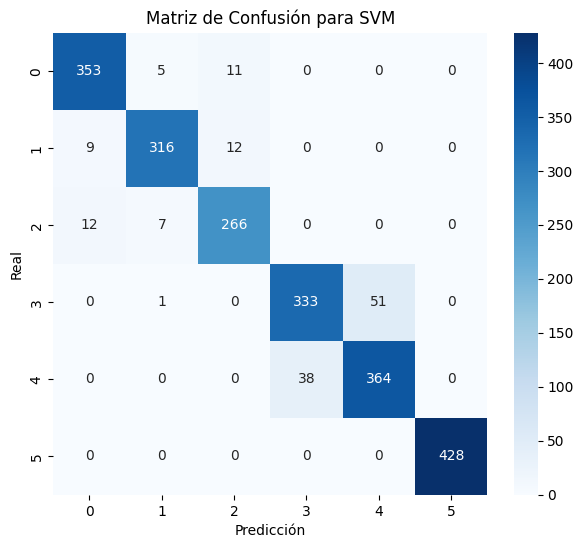

In [39]:

svm = SVC()

svm.fit(X_train_pca, y_train)
y_pred_svm_libreria = svm.predict(X_test_pca)


accuracy_svm_libreria = accuracy_score(y_test, y_pred_svm_libreria)
f1_svm = f1_score(y_test, y_pred_svm_libreria, average='weighted')
cm_svm_libreria = confusion_matrix(y_test, y_pred_svm_libreria)


print("Modelo Usado: SVM:")
print("Resultado del Accuracy:", accuracy_svm_libreria)
print("Resultado del F1-Score:", f1_svm)
print("Reporte del Modelo:\n", classification_report(y_test, y_pred_svm_libreria))
print("\n")


plt.figure(figsize=(7, 6))
sns.heatmap(cm_svm_libreria, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para SVM')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## Implementación

Ahora implementaremos los modelos Árbol de Decisión y KNN para luego realizar la comparacion de Scores

### Árbol de desición

In [40]:
class Nodo:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.label = None
        self.feature_index = None
        self.threshold = None
        self.izquierda = None
        self.derecha = None

    def IsTerminal(self):
        return len(np.unique(self.Y)) == 1

    def entropy(self):
        _, counts = np.unique(self.Y, return_counts=True)
        probabilities = counts / len(self.Y)
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
        return entropy

    def information_gain(self, left_Y, right_Y):
        parent_entropy = self.entropy()
        left_entropy = self.entropy_array(left_Y)
        right_entropy = self.entropy_array(right_Y)
        total_samples = len(self.Y)

        info_gain = parent_entropy - (
            (len(left_Y) / total_samples) * left_entropy +
            (len(right_Y) / total_samples) * right_entropy
        )
        return info_gain

    def entropy_array(self, Y):
        _, counts = np.unique(Y, return_counts=True)
        probabilities = counts / len(Y)
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
        return entropy

    def BestSplit(self):
        best_feature_index = None
        best_threshold = None
        best_info_gain = -1

        for feature_index in range(self.X.shape[1]):
            unique_values = np.unique(self.X[:, feature_index])
            for i in range(len(unique_values) - 1):
                threshold = (unique_values[i] + unique_values[i + 1]) / 2
                left_mask = self.X[:, feature_index] <= threshold
                right_mask = ~left_mask
                info_gain = self.information_gain(self.Y[left_mask], self.Y[right_mask])
                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, Y):
        self.root = self._create_tree(X, Y, depth=0)

    def _create_tree(self, X, Y, depth):
        node = Nodo(X, Y)

        if node.IsTerminal() or (self.max_depth and depth == self.max_depth):
            node.label = np.argmax(np.bincount(Y))
            return node

        feature_index, threshold = node.BestSplit()
        if feature_index is None:
            node.label = np.argmax(np.bincount(Y))
            return node

        node.feature_index = feature_index
        node.threshold = threshold

        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask

        node.izquierda = self._create_tree(X[left_mask], Y[left_mask], depth + 1)
        node.derecha = self._create_tree(X[right_mask], Y[right_mask], depth + 1)

        return node

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.root) for sample in X])

    def _predict_sample(self, sample, node):
        if node.label is not None:
            return node.label

        if sample[node.feature_index] <= node.threshold:
            return self._predict_sample(sample, node.izquierda)
        else:
            return self._predict_sample(sample, node.derecha)

#### Entrenamiento y testing del Árbol de Decisión

Accuracy: 0.899365367180417
F1 Score: 0.8994209991268531
Matriz de Confusión:
[[317  40  12   0   0   0]
 [ 17 294  26   0   0   0]
 [ 18  27 240   0   0   0]
 [  0   1   0 328  55   1]
 [  0   0   0  22 379   1]
 [  0   0   0   2   0 426]]


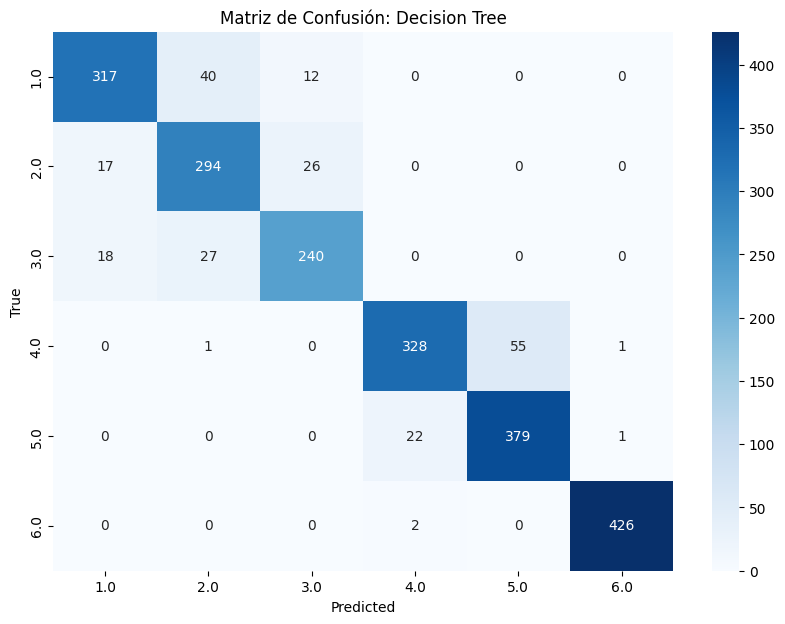

              precision    recall  f1-score   support

         1.0       0.90      0.86      0.88       369
         2.0       0.81      0.87      0.84       337
         3.0       0.86      0.84      0.85       285
         4.0       0.93      0.85      0.89       385
         5.0       0.87      0.94      0.91       402
         6.0       1.00      1.00      1.00       428

    accuracy                           0.90      2206
   macro avg       0.90      0.89      0.89      2206
weighted avg       0.90      0.90      0.90      2206



In [41]:

dt = DecisionTree(max_depth=10)
dt.fit(X_train_pca, y_train)


y_pred_arbol = dt.predict(X_test_pca)

accuracy_arbol = accuracy_score(y_test, y_pred_arbol)
f1_arbol = f1_score(y_test, y_pred_arbol, average='weighted')
cm_arbol = confusion_matrix(y_test, y_pred_arbol)

print(f"Accuracy: {accuracy_arbol}")
print(f"F1 Score: {f1_arbol}")
print("Matriz de Confusión:")
print(cm_arbol)


plt.figure(figsize=(10, 7))
sns.heatmap(cm_arbol, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión: Decision Tree')
plt.show()

print(classification_report(y_test, y_pred_arbol))

### KNN

In [42]:

def knn(p, X, k):
    k_dist = PriorityQueue(k)
    for i in range(len(X)):
        dist = np.linalg.norm(X[i] - p)
        if not k_dist.full():
            k_dist.put((-dist, i))
        else:
            least_min = k_dist.get()
            if dist < abs(least_min[0]):
                k_dist.put((-dist, i))
            else:
                k_dist.put(least_min)
    return k_dist


def train_knn(X, k, X_train, Y_train):
    Y = list(Y_train)
    y_pred = []
    for p in X:
        k_elem = knn(p, X_train, k)
        y_temp = []
        while not k_elem.empty():
            idx = k_elem.get()[1]
            y_temp.append(Y[idx])
        y_pred.append(max(set(y_temp), key = y_temp.count))
    return y_pred

In [43]:

accuracy = []
for k in range(10):
    y_pred_knn = train_knn(X_test_pca, k+1, X_train_pca, y_train)
    accuracy.append(accuracy_score(y_test, y_pred_knn))

best_k = np.argmax(accuracy) + 1
print('Mejor k: ', best_k)
print(f'Accuracy para k={best_k}:', accuracy[best_k-1])

Mejor k:  1
Accuracy para k=1: 0.9546690843155031


Accuracy: 0.9546690843155031
F1 Score: 0.9546042833127546
Matriz de Confusión:
[[354   7   8   0   0   0]
 [ 13 317   7   0   0   0]
 [ 16  13 256   0   0   0]
 [  0   1   0 365  19   0]
 [  0   0   0  16 386   0]
 [  0   0   0   0   0 428]]


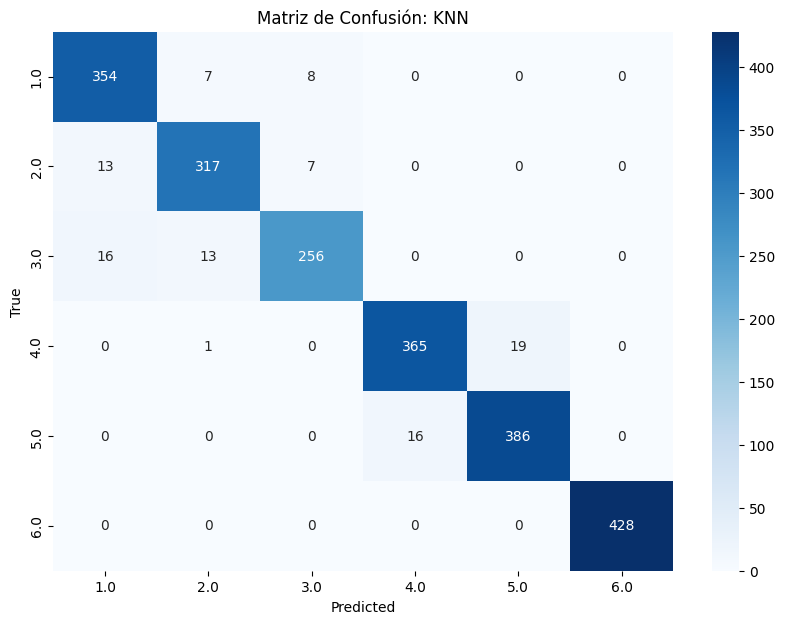

              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       369
         2.0       0.94      0.94      0.94       337
         3.0       0.94      0.90      0.92       285
         4.0       0.96      0.95      0.95       385
         5.0       0.95      0.96      0.96       402
         6.0       1.00      1.00      1.00       428

    accuracy                           0.95      2206
   macro avg       0.95      0.95      0.95      2206
weighted avg       0.95      0.95      0.95      2206



In [44]:
y_pred_knn = train_knn(X_test_pca, best_k, X_train_pca, y_train)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")
print(f"F1 Score: {f1_knn}")
print("Matriz de Confusión:")
print(cm_knn)

# Graficar la Matriz de Confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión: KNN')
plt.show()

print(classification_report(y_test, y_pred_knn))

## Testing

#### Preparacion de la data para el testing

In [45]:

X_test_data_rocket = rocket.transform(test_data)

X_test_data_scaled = scaler.transform(X_test_data_rocket)

X_test_data_pca = pca.transform(X_test_data_scaled)



### Testing del Árbol de decisión

In [46]:
predictions_arbol = dt.predict(X_test_data_pca)

indices = np.arange(1, len(predictions_arbol) + 1)
results_arbol = pd.DataFrame({'index': indices, 'prediction': predictions_arbol})

results_arbol.to_csv('predicciones_arbol.csv', index=False, header=False)

### Testing del KNN

In [47]:

predictions_knn = train_knn(X_test_data_pca, best_k, X_train_pca, y_train)

indices = np.arange(1, len(predictions_knn) + 1)
results_knn = pd.DataFrame({'index': indices, 'prediction': predictions_knn})

results_knn.to_csv('predicciones_knn.csv', index=False, header=False)